In [1]:
##MSC

import scanpy as sc
import pandas as pd
from scipy.io import mmread



In [2]:

adata = sc.read_h5ad("Progeria_bone_marrow.h5ad")#Please download it from GEO

In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)

sc.pp.pca(adata)
sc.pp.neighbors(adata)


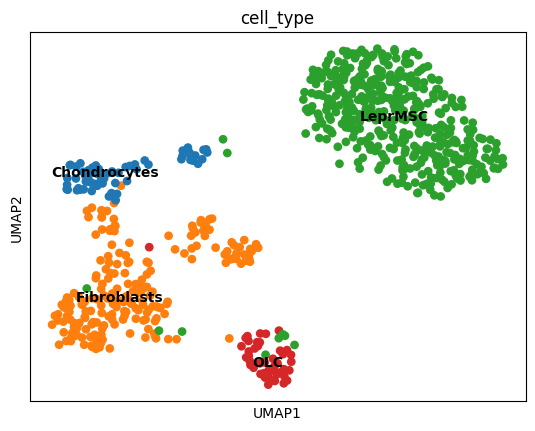

In [5]:
sc.pl.umap(adata, color=["cell_type"],legend_loc='on data')

<Axes: xlabel='cell_type', ylabel='SenNeuNet'>

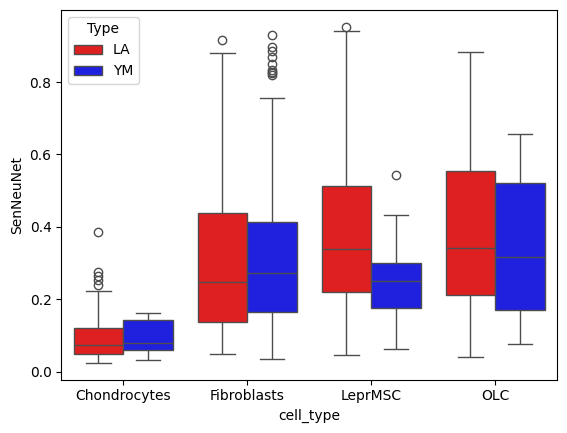

In [9]:
import seaborn as sns

sns.boxplot(x='cell_type', y='SenNeuNet', hue="Type", data=adata.obs[adata.obs["cell_type"].isin(["OLC","Chondrocytes","Endothelial","Fibroblasts","LeprMSC"])],palette=["red","blue"])